#*Samriddh Singh*
## **GRIP @ TSF TASK - 3**
### Problem Statement: Data visualisation to gain insights to increase the profits.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data = pd.read_csv("SampleSuperstore.csv")
df = pd.DataFrame(data)
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Understanding the data-types and unique values in each column.

In [ ]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Since there is only one country and postal code and city are not of much importance here as we have other features to describe the same information in a better way, so we drop these columns.

In [ ]:
df.drop(["Postal Code","City","Country"],axis = 1, inplace =True)
df.head(10)

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Let us see are the numerical data related anywhere ?

In [ ]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


#### A correlation of Sales vs Profit made is there which is about 0.48 .

## Data visualisation

### Let is try to plot the numerical data features against each other to visualise and find any trends if any:

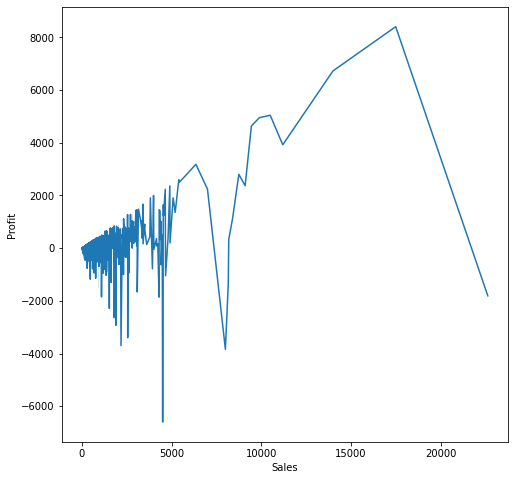

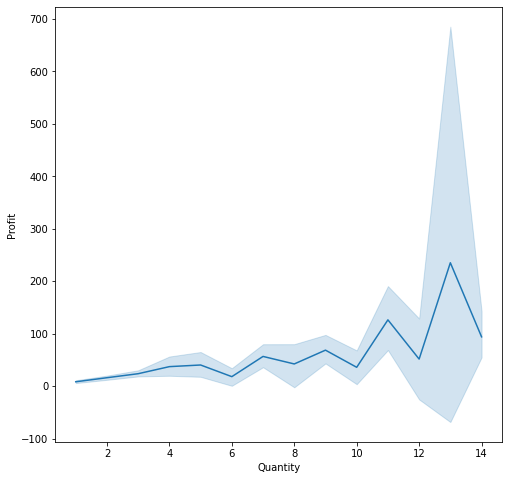

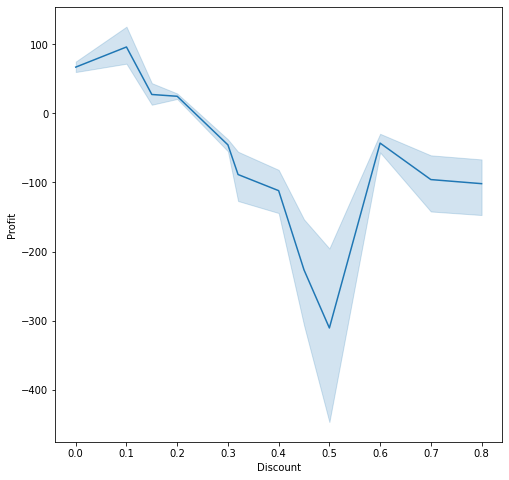

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
X=["Sales","Quantity","Discount","Profit"]

for x in X:
  if(x!="Profit"):
   sns.lineplot(x=df[x],y=df["Profit"])
   plt.show()

#### Since profit and sales have slight positive correlation of about 0.48, it appears in its graph as well, however since the scales of two features differ widely, let us take the logarithm of the sales feature to understand better.

#### There was a drop in the profit made when the discount was around 50%, we will find why did this occur and in which category later in our analysis.


#### Profit and quantity are also slightly correlated positively. Obviously, more the number of quantities sold, higher is the profit earned.


#### The following graph shows the relation between sales and profit

Text(0, 0.5, 'Profit')

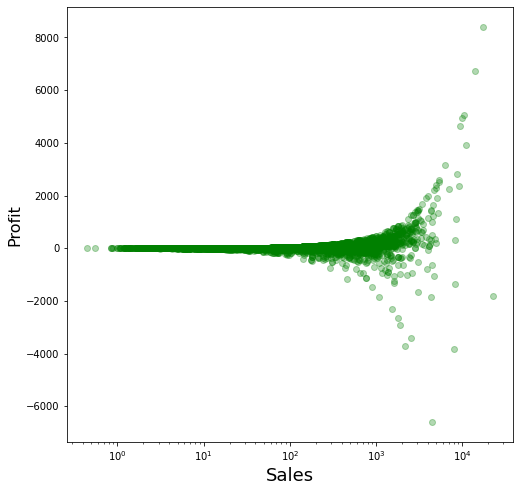

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(x=df["Sales"],y=df["Profit"], c='green',alpha = 0.3,)
ax.set_xscale('log')
plt.xlabel('Sales', fontsize=18)
plt.ylabel('Profit', fontsize=16)

## Let us try to understand the three segments of customers namely: Retail Consumers, Corporate Sector and Home-Office clients.

###I segregated the dataframe into these three classes and analysed the trends in the following manner:

In [ ]:
segments =["Consumer","Corporate","Home Office"]
for seg in segments:
  consumer_df = df[df.Segment == 'Consumer']
  Corporate_df = df[df.Segment == 'Corporate']
  Ho_df = df[df.Segment == 'Home Office']

In [ ]:
consumer_df.shape

(5191, 10)

In [ ]:
consumer_df.describe()

,Sales,Quantity,Discount,Profit
count,5191.000000,5191.000000,5191.000000,5191.000000
mean,223.733644,3.760547,0.158141,25.836873
std,585.516175,2.206898,0.207485,242.594020
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.264000,2.000000,0.000000,1.583550
50%,53.720000,3.000000,0.200000,8.375400
75%,206.106000,5.000000,0.200000,28.606700
max,13999.960000,14.000000,0.800000,6719.980800


### We have about 5200 retail customers and the average profit earned fromt his segment is 25.84%

##### Let us see the following graphs to infer better.

In [ ]:
columns = ["Ship Mode","State","Category", "Sales", "Quantity", "Discount"]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


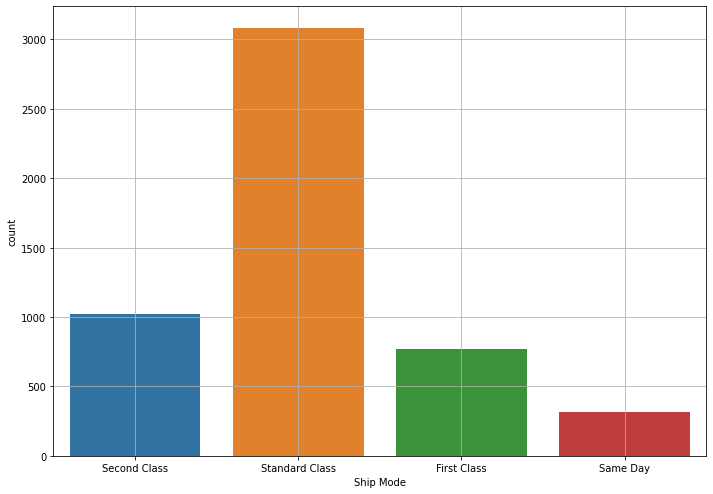

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Standard Class    3085
Second Class      1020
First Class        769
Same Day           317
Name: Ship Mode, dtype: int64


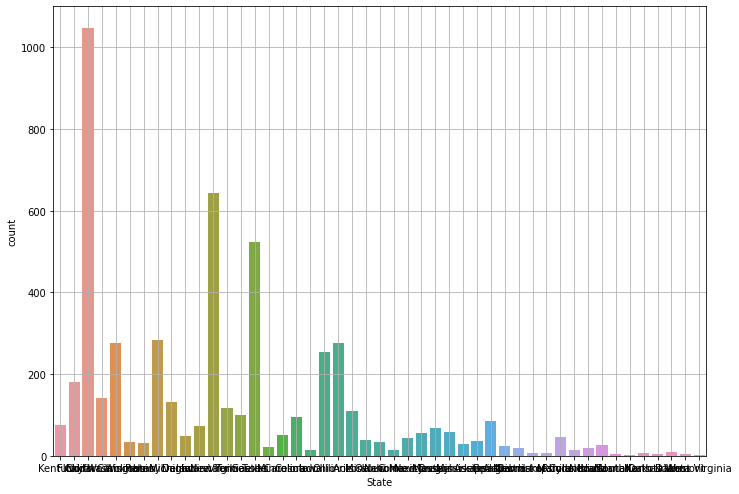

California              1048
New York                 643
Texas                    524
Pennsylvania             284
Illinois                 276
Washington               275
Ohio                     255
Florida                  180
North Carolina           142
Michigan                 132
Virginia                 117
Arizona                  110
Tennessee                100
Colorado                  95
Georgia                   85
Kentucky                  76
Indiana                   73
Oregon                    67
Massachusetts             58
New Jersey                57
Minnesota                 51
Delaware                  49
Maryland                  46
Connecticut               43
Missouri                  38
Arkansas                  37
Wisconsin                 35
Oklahoma                  35
Utah                      31
Mississippi               28
Louisiana                 26
Alabama                   25
South Carolina            22
Nebraska                  19
Nevada        

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


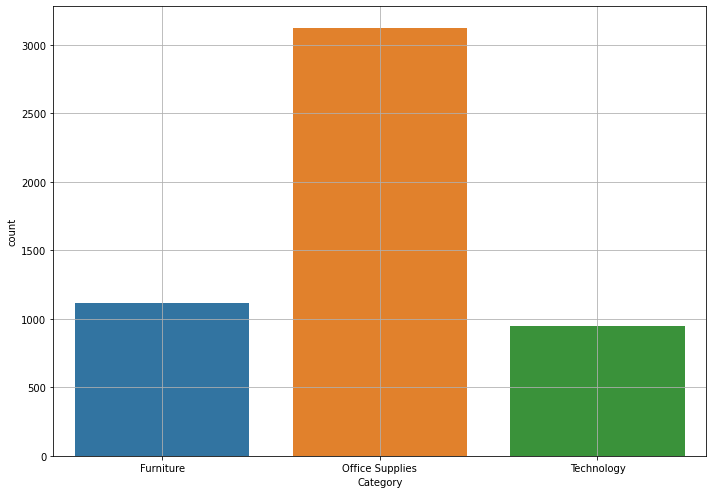

Office Supplies    3127
Furniture          1113
Technology          951
Name: Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


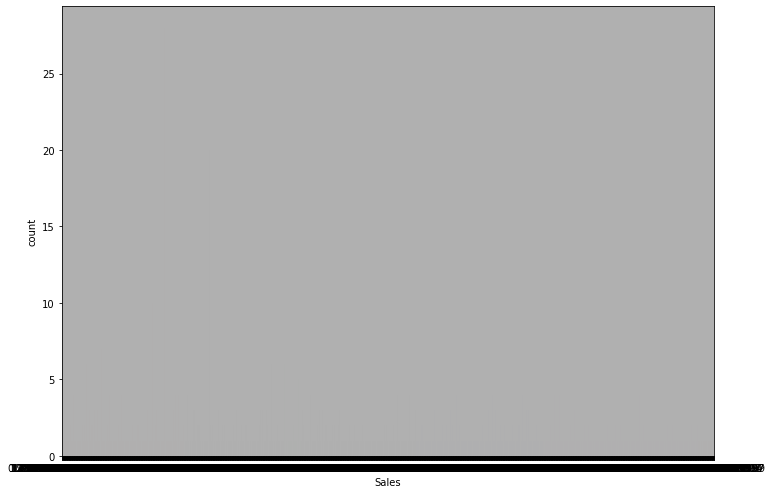

12.9600     28
15.5520     21
25.9200     20
19.4400     20
10.3680     20
            ..
156.3728     1
1.2480       1
6.9000       1
9.1200       1
55.5000      1
Name: Sales, Length: 3645, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


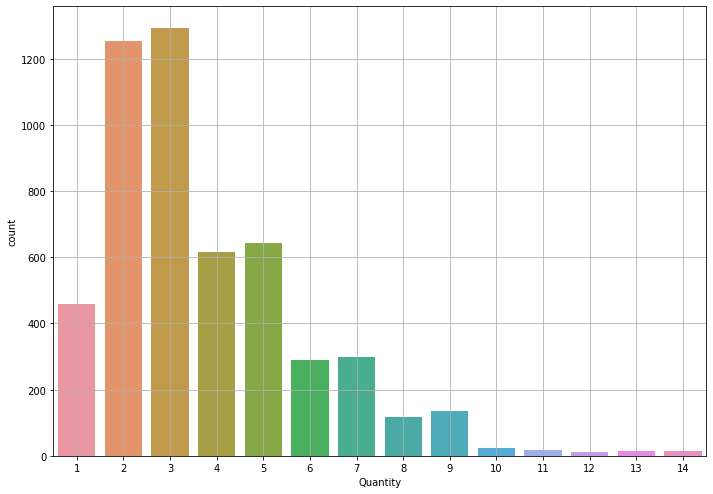

3     1294
2     1254
5      642
4      616
1      458
7      299
6      289
9      136
8      117
10      25
11      18
14      16
13      16
12      11
Name: Quantity, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


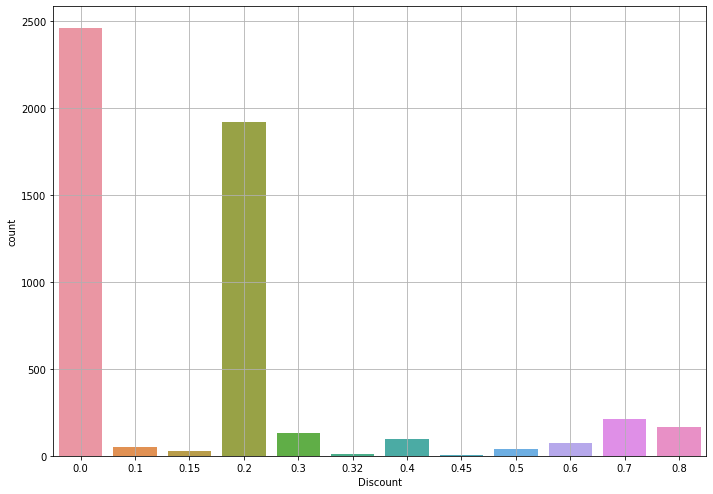

0.00    2461
0.20    1916
0.70     210
0.80     167
0.30     132
0.40      96
0.60      74
0.10      50
0.50      37
0.15      29
0.32      13
0.45       6
Name: Discount, dtype: int64


In [ ]:
for column in columns:
  fig, ax = plt.subplots()
  fig.set_size_inches(11.7, 8.27)
  sns.countplot(consumer_df[column],ax=ax)
  plt.grid()
  plt.show()
  print(consumer_df[column].value_counts())

## Points to note:
1. Average profit is 25.84% .
2. Majority sales are in California, New York and Texas where we can see future customers as well.
3. Consumers in the Segment purchase Office Supplies and lesser on Furniture.
4. Interstingly customers almost always prefer to buy in pairs or more: 

Quantity vs Count 


  3        1294

  2        1254

  5        642

  4        616

  1        458


In [ ]:
Corporate_df.describe()

,Sales,Quantity,Discount,Profit
count,3020.000000,3020.000000,3020.000000,3020.000000
mean,233.823300,3.843709,0.158228,30.456667
std,599.410408,2.238676,0.206548,231.986266
min,0.556000,1.000000,0.000000,-3839.990400
25%,17.469000,2.000000,0.000000,1.928400
50%,56.540000,3.000000,0.200000,8.694000
75%,212.895000,5.000000,0.200000,29.843500
max,17499.950000,14.000000,0.800000,8399.976000


### Let us analyse the segment of Corporate customers: here the average profit is about 5% higher than usual customers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


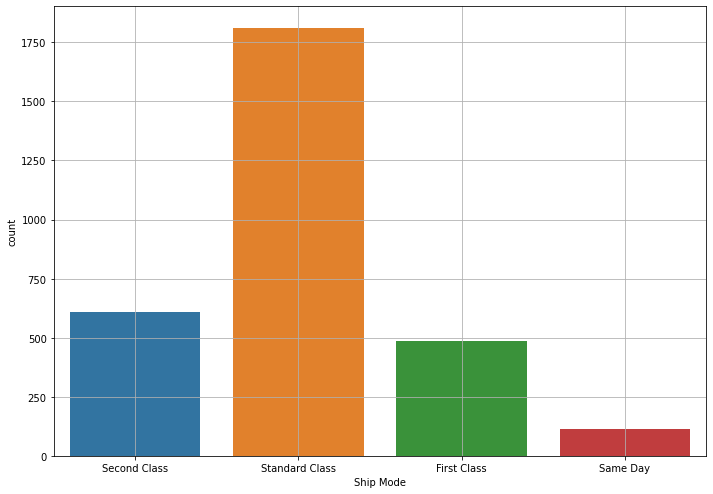

Standard Class    1812
Second Class       609
First Class        485
Same Day           114
Name: Ship Mode, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


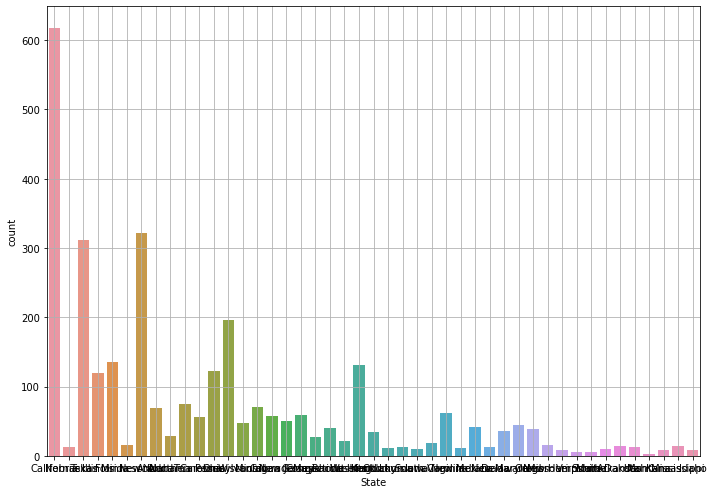

California        618
New York          321
Texas             312
Pennsylvania      196
Florida           136
Washington        131
Ohio              123
Illinois          120
North Carolina     75
Michigan           70
Arizona            69
Virginia           62
Georgia            59
Colorado           57
Tennessee          56
New Jersey         50
Wisconsin          47
Maryland           44
Indiana            41
Massachusetts      40
Oregon             38
Delaware           36
Kentucky           35
Alabama            28
Connecticut        27
Rhode Island       21
South Carolina     19
Minnesota          16
Missouri           15
Arkansas           14
Mississippi        14
Nevada             13
Nebraska           13
Utah               12
Louisiana          12
Oklahoma           11
New Mexico         11
Iowa               10
South Dakota       10
New Hampshire       9
Idaho               9
Kansas              8
Vermont             5
Maine               5
Montana             2
Name: Stat

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


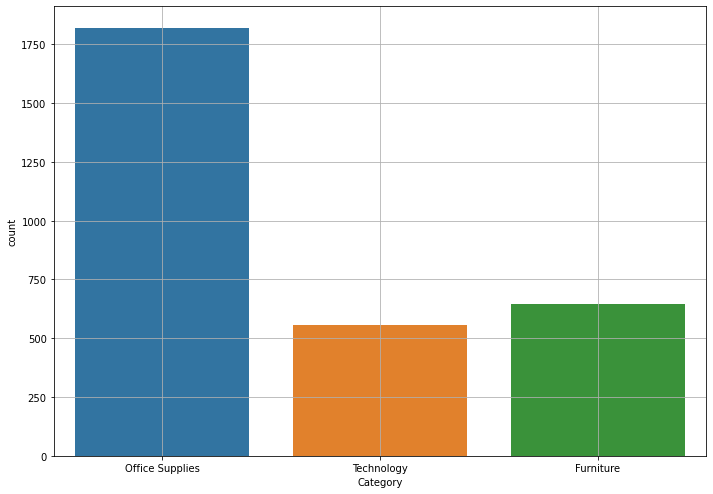

Office Supplies    1820
Furniture           646
Technology          554
Name: Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


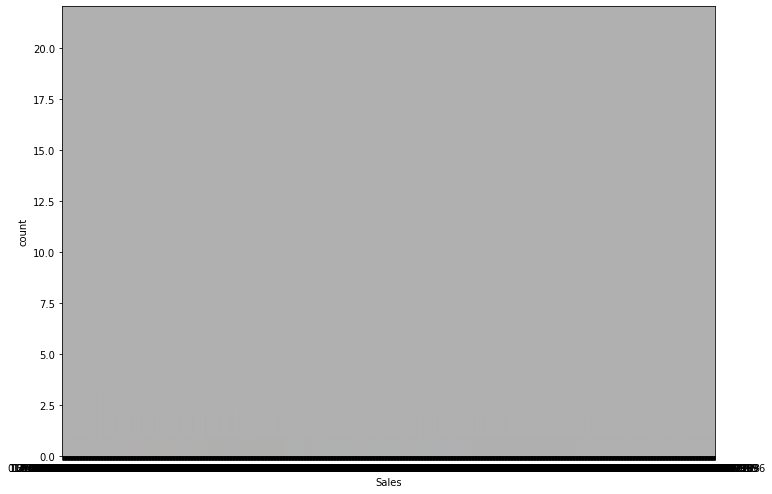

12.960     21
10.368     11
15.552     11
25.920     10
19.440     10
           ..
88.752      1
161.820     1
532.720     1
173.208     1
15.250      1
Name: Sales, Length: 2393, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


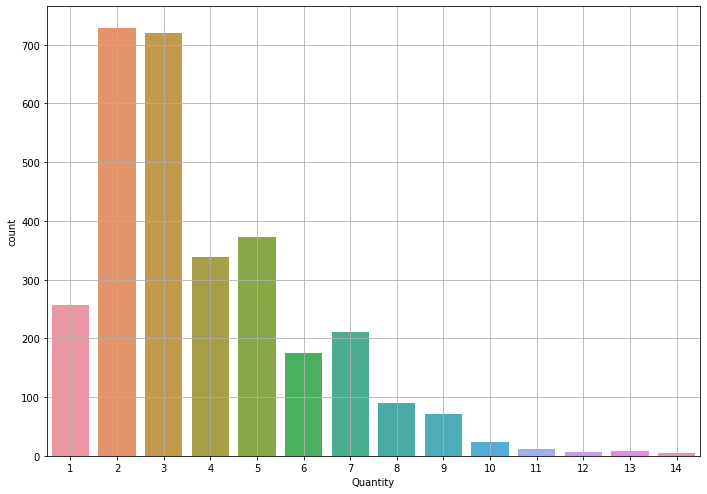

2     729
3     720
5     372
4     339
1     257
7     211
6     175
8      90
9      72
10     23
11     11
13      9
12      7
14      5
Name: Quantity, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


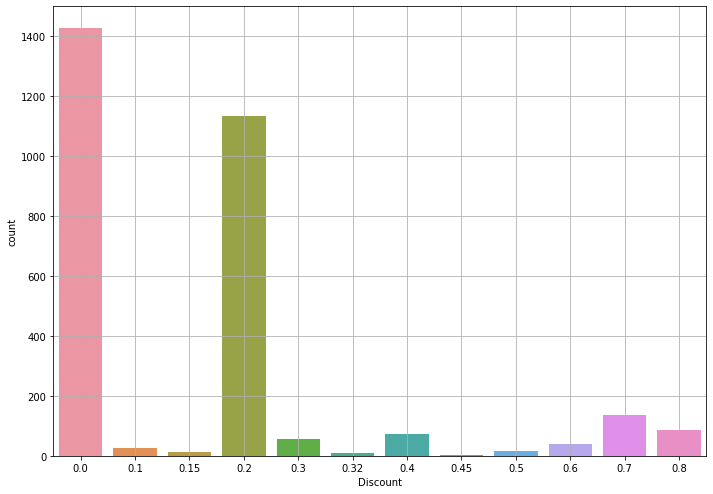

0.00    1427
0.20    1132
0.70     135
0.80      87
0.40      74
0.30      55
0.60      39
0.10      27
0.50      17
0.15      14
0.32      10
0.45       3
Name: Discount, dtype: int64


In [ ]:
for column in columns:
  fig, ax = plt.subplots()
  fig.set_size_inches(11.7, 8.27)
  sns.countplot(Corporate_df[column], ax=ax)
  plt.grid()
  plt.show()
  print(Corporate_df[column].value_counts())

## Key insights here


1. Average profit is 30% .
2. Majority sales are in California, New York and Texas where we can see future customers as well, again.
3. Consumers in the Segment purchase Office Supplies and lesser on furniture, similar to above.
4. Interstingly customers almost always prefer to buy in pairs or more:
Quantity vs Count.

In [ ]:
Ho_df.describe()

,Sales,Quantity,Discount,Profit
count,1783.000000,1783.000000,1783.000000,1783.000000
mean,240.972041,3.782389,0.147128,33.818664
std,755.516379,2.254260,0.203119,212.381482
min,0.990000,1.000000,0.000000,-3399.980000
25%,17.045000,2.000000,0.000000,1.984250
50%,52.440000,3.000000,0.000000,9.102000
75%,210.906000,5.000000,0.200000,31.559850
max,22638.480000,14.000000,0.800000,3919.988800


### The profit here is highest of all about 34%, and the deviation of profits are too high between maximum and minimum.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


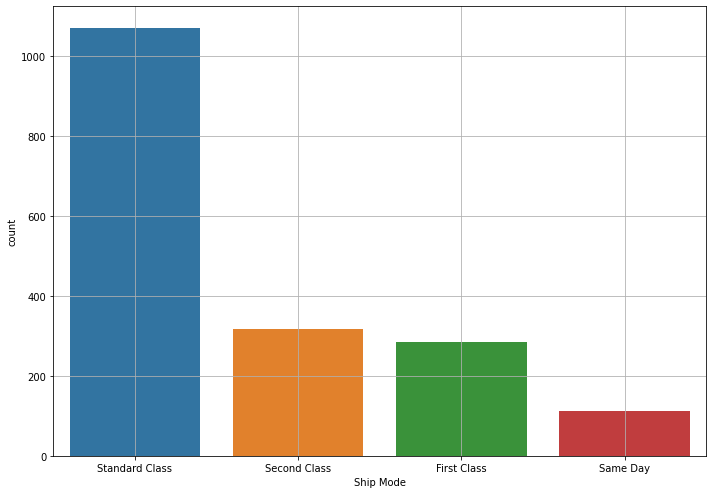

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Standard Class    1071
Second Class       316
First Class        284
Same Day           112
Name: Ship Mode, dtype: int64


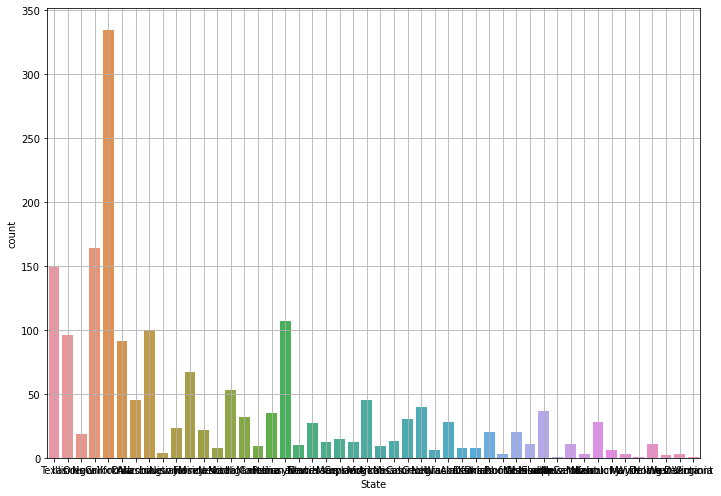

California              335
New York                164
Texas                   149
Pennsylvania            107
Washington              100
Illinois                 96
Ohio                     91
Florida                  67
Michigan                 53
Virginia                 45
Arizona                  45
Georgia                  40
Massachusetts            37
Indiana                  35
North Carolina           32
Colorado                 30
Wisconsin                28
Kentucky                 28
Tennessee                27
New Jersey               23
Minnesota                22
Oklahoma                 20
Rhode Island             20
Oregon                   19
Maryland                 15
Missouri                 13
Connecticut              12
New Hampshire            12
Delaware                 11
Mississippi              11
New Mexico               11
Utah                     10
Montana                   9
Arkansas                  9
Alabama                   8
Nevada              

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


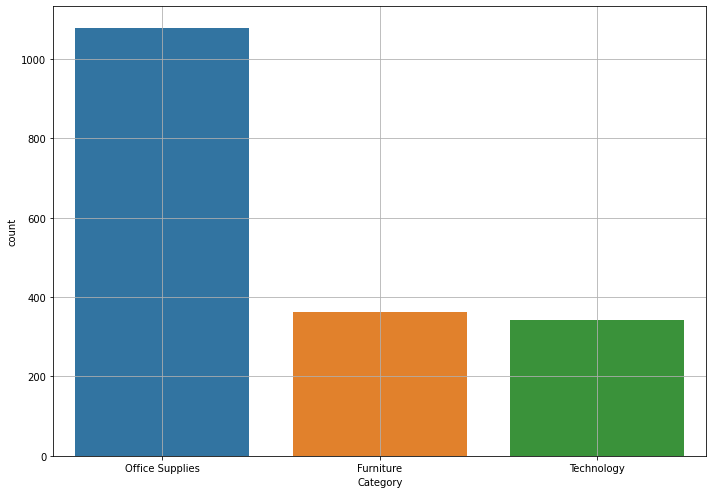

Office Supplies    1079
Furniture           362
Technology          342
Name: Category, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


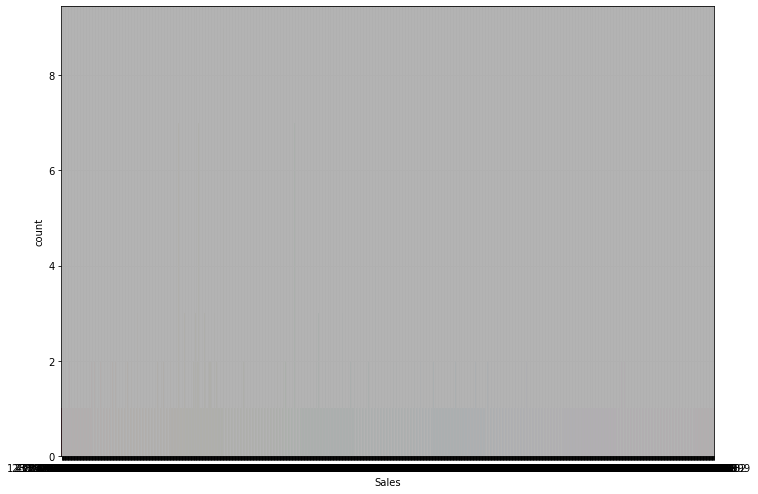

19.440     9
15.552     7
12.960     7
32.400     7
20.736     6
          ..
60.120     1
17.480     1
379.372    1
18.160     1
29.000     1
Name: Sales, Length: 1525, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


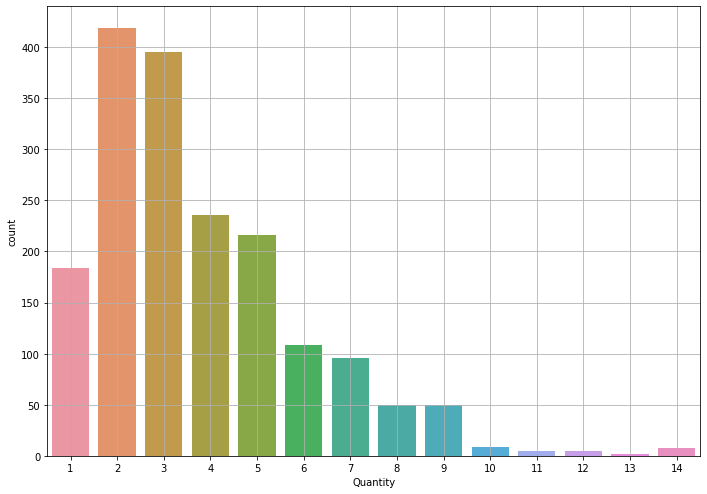

2     419
3     395
4     236
5     216
1     184
6     108
7      96
9      50
8      50
10      9
14      8
12      5
11      5
13      2
Name: Quantity, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


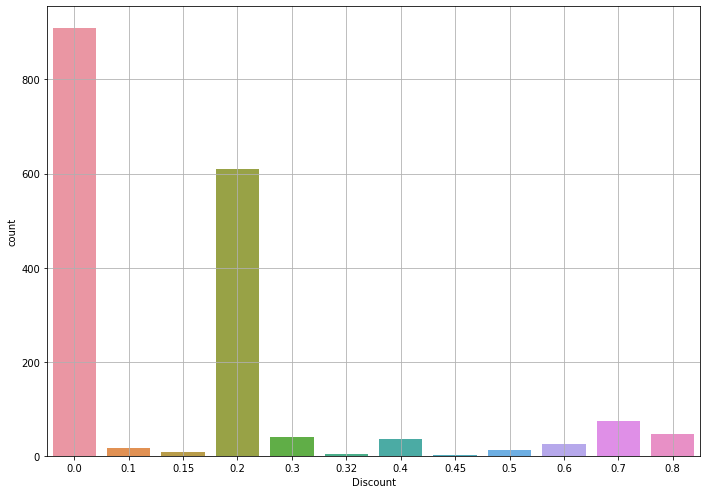

0.00    910
0.20    609
0.70     73
0.80     46
0.30     40
0.40     36
0.60     25
0.10     17
0.50     12
0.15      9
0.32      4
0.45      2
Name: Discount, dtype: int64


In [ ]:
for column in columns:
  fig, ax = plt.subplots()
  fig.set_size_inches(11.7, 8.27)
  sns.countplot(Ho_df[column], ax=ax)
  plt.grid()
  plt.show()
  print(Ho_df[column].value_counts())

The insights from this data is:

1. Average Profit is highest from this segment of branch around 34%.

2. The major customers are again from California, then it decreases significantly to half the number.



## Now let us analyse the dataset on the basis of Sub-Category column:


In [ ]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

#### We have 17 sub-categories in which the products are as mentioned. Now we will group them into a new dataset and find the average profit earned in selling items of each category.

In [ ]:
grp = df.groupby("Sub-Category").mean()
grp["Quantity"] = df["Sub-Category"].value_counts()
grp.head(17)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,215.974604,775,0.078452,54.111788
Appliances,230.755710,466,0.166524,38.922758
Art,34.068834,796,0.074874,8.200737
Binders,133.560560,1523,0.372292,19.843574
Bookcases,503.859633,228,0.211140,-15.230509
Chairs,532.332420,617,0.170178,43.095894
Copiers,2198.941618,68,0.161765,817.909190
Envelopes,64.867724,254,0.080315,27.418019
Fasteners,13.936774,217,0.082028,4.375660


## We already have some cool insights now, let us visualise them and then we can discuss further.

In [ ]:
gcol = grp.columns
gcol

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

## Variation of Sales in each sub-category

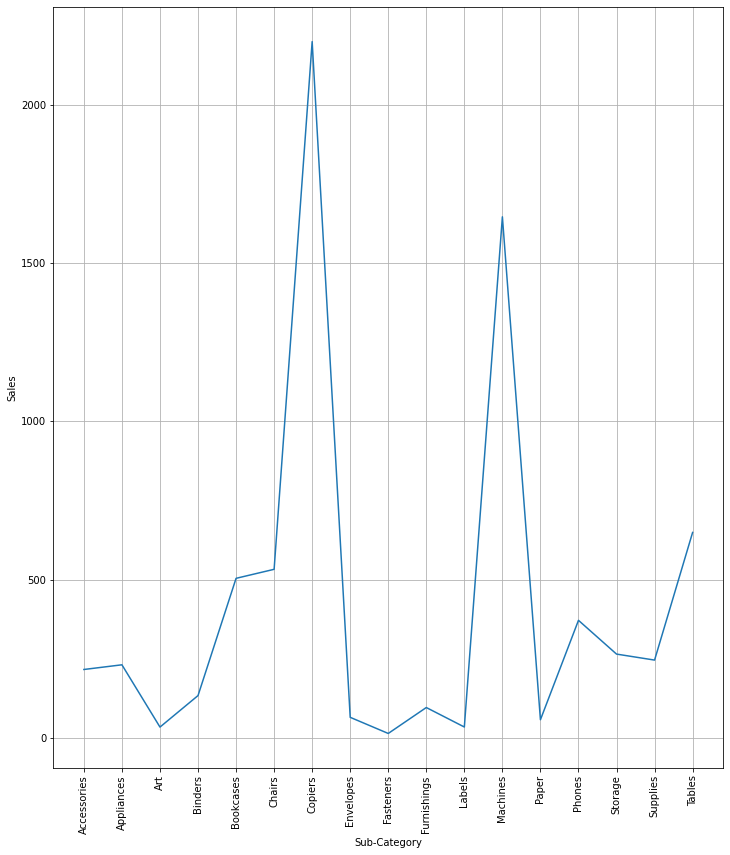

Sub-Category
Accessories     215.974604
Appliances      230.755710
Art              34.068834
Binders         133.560560
Bookcases       503.859633
Chairs          532.332420
Copiers        2198.941618
Envelopes        64.867724
Fasteners        13.936774
Furnishings      95.825668
Labels           34.303055
Machines       1645.553313
Paper            57.284092
Phones          371.211534
Storage         264.590553
Supplies        245.650200
Tables          648.794771
Name: Sales, dtype: float64


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 14)
g = sns.lineplot( x = grp.index,y = grp["Sales"], ax=ax, legend = "brief")
plt.xticks(rotation =90)
plt.grid()
plt.show()

print(grp["Sales"])

## In the above graph note that:
#### 1. Copiers and machines have excceptionally high sales.
#### 2. Fasteners, Arts and Labels category have minimum sales.

## Variation of Quantity in each sub-category.

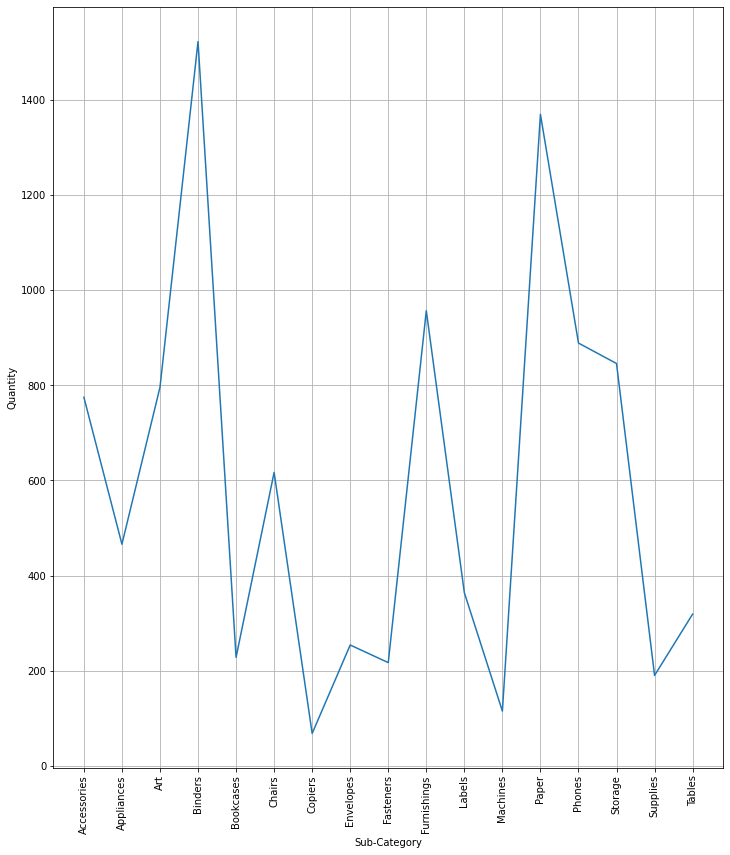

<bound method Series.sort_values of Sub-Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Quantity, dtype: int64>


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 14)
g = sns.lineplot( x = grp.index,y = grp["Quantity"], ax=ax, legend = "brief")
plt.xticks(rotation =90)
plt.grid()
plt.show()
print(grp["Quantity"].sort_values)

## In the above graph note that:
#### 1. Binders and paper have maximum quantity.
#### 2. However, since we have seen that the sales of Fasteners, art and labels is exceptionally low we can reduce the quantity of them in the store.

## Variation of Discount given in each sub-category.

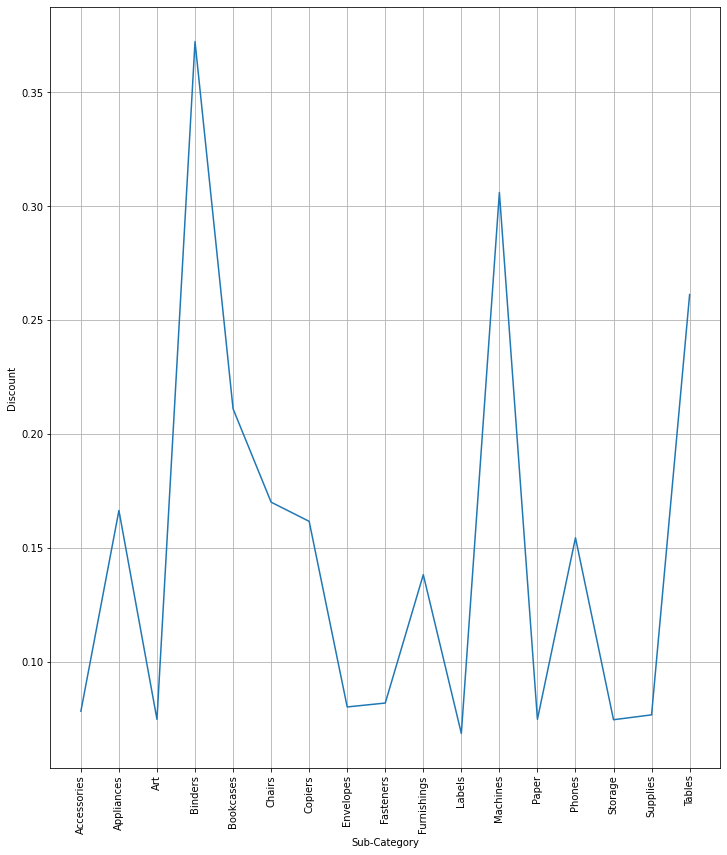

Sub-Category
Accessories    0.078452
Appliances     0.166524
Art            0.074874
Binders        0.372292
Bookcases      0.211140
Chairs         0.170178
Copiers        0.161765
Envelopes      0.080315
Fasteners      0.082028
Furnishings    0.138349
Labels         0.068681
Machines       0.306087
Paper          0.074891
Phones         0.154556
Storage        0.074704
Supplies       0.076842
Tables         0.261285
Name: Discount, dtype: float64


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 14)
g = sns.lineplot( x = grp.index,y = grp["Discount"], ax=ax, legend = "brief")
plt.xticks(rotation =90)
plt.grid()
plt.show()
print(grp["Discount"])

## In the above graph note that:
#### 1. Maximum discounts were provided in Binders, Machines and Tables.
#### 2. We will later analyse wether the discounts earned us any profit or did they incur some losses ?

## Variation of Profit in each sub-category.

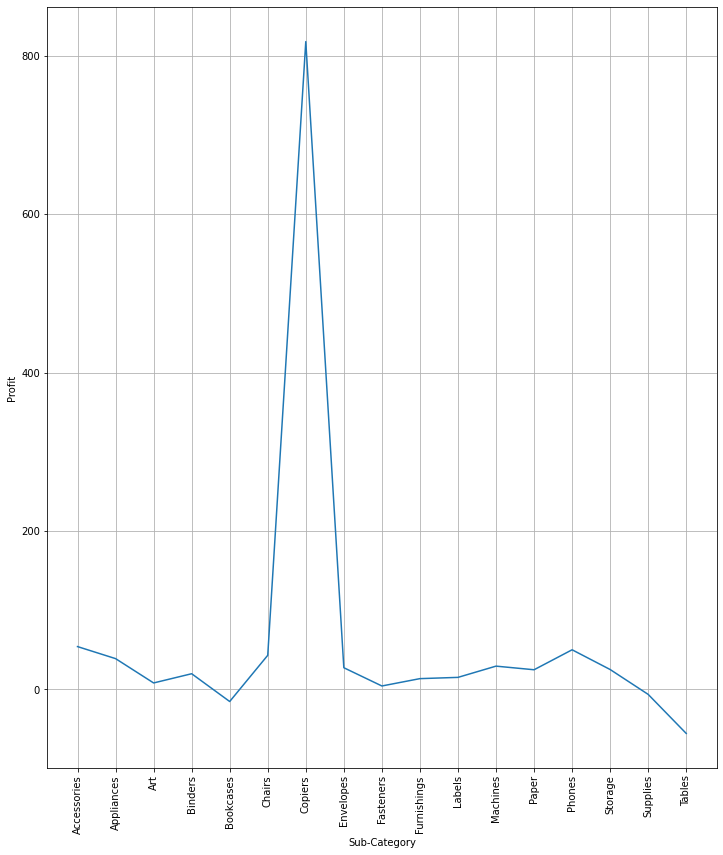

Sub-Category
Accessories     54.111788
Appliances      38.922758
Art              8.200737
Binders         19.843574
Bookcases      -15.230509
Chairs          43.095894
Copiers        817.909190
Envelopes       27.418019
Fasteners        4.375660
Furnishings     13.645918
Labels          15.236962
Machines        29.432669
Paper           24.856620
Phones          50.073938
Storage         25.152277
Supplies        -6.258418
Tables         -55.565771
Name: Profit, dtype: float64


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 14)
g = sns.lineplot( x = grp.index,y = grp["Profit"], ax=ax, legend = "brief")
plt.xticks(rotation =90)
plt.grid()
plt.show()
print(grp["Profit"])

## Insights from the graph:

#### 1. Maxiumum profit gained from sale of copiers.
####  2. The major profit is earned by copiers, Accessories, Phones and chairs. Hence, we can always increase advertising of such items and improve our sales.Other than this, all other items do provide a fairly good amount of profit. 
####  3. Maxium loss incurred from the sale of tables, which as we know were sold at a discount of 26%. We can definitely remove tables or look for another manufacturer to provide us a better price and quality.
####  4.Other than these, the items which incur losses are- Book cases, Supplies and ofcourse tables.

### Let us quickly visualise all the above graphs in one grid to see how the compare against each other.

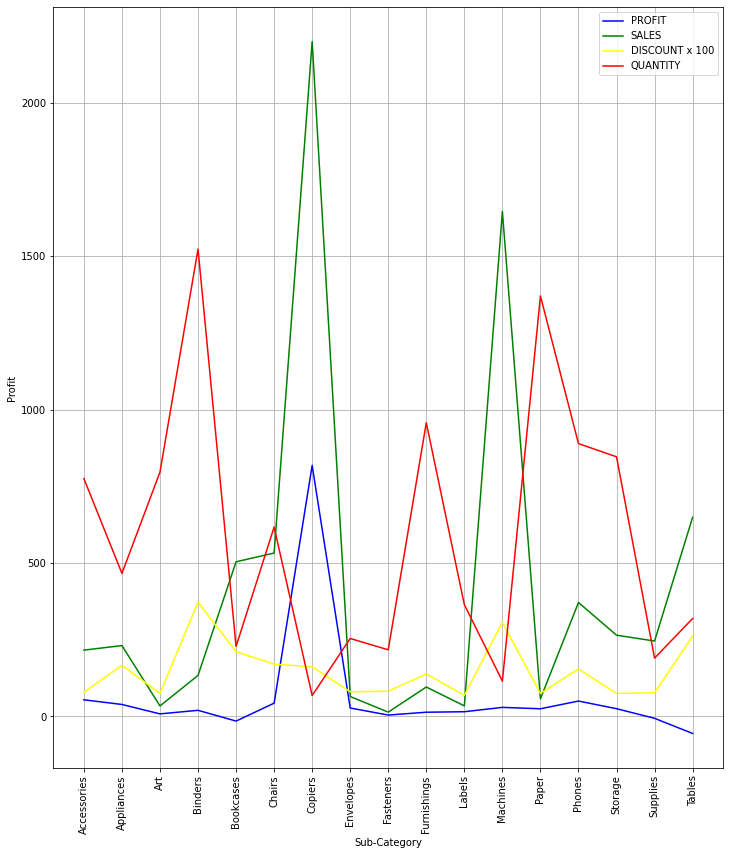

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 14)
sns.lineplot( x = grp.index,y = grp["Profit"], ax=ax, legend = "brief", color = "blue", label ="PROFIT")
sns.lineplot( x = grp.index,y = grp["Sales"], ax=ax, legend = "brief", color = "Green",label ="SALES")
sns.lineplot( x = grp.index,y = 1000*grp["Discount"], ax=ax, legend = "brief", color = "Yellow",label ="DISCOUNT x 100")
sns.lineplot( x = grp.index,y = grp["Quantity"], ax=ax, legend = "brief", color = "Red", label ="QUANTITY")
plt.xticks(rotation =90)
plt.grid()
plt.show()

## Insights from above:
####  1. Interestingly, providing higher discounts, higher sales, higher quantities in tables incurred us the maximum loss !
####  2. Copier has the least quantity available yet sky-rocketing the profits and hence we should focus more in this segment.
####  3. We have not so good sale of furnishings, but we have surplus of its quantity.


### Now we can perform our analysis on how the profit and sales vary along each state in USA. 

In [108]:
sm = df.groupby("State").mean()
sm["Quantity"] = df["State"].value_counts()
sm.drop("Postal Code", axis =1, inplace= True)
sm.head(10)

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,319.846557,61,0.000000,94.865989
Arizona,157.508933,224,0.303571,-15.303235
Arkansas,194.635500,60,0.000000,66.811452
California,228.729451,2001,0.072764,38.171608
Colorado,176.418231,182,0.316484,-35.867351
Connecticut,163.223866,82,0.007317,42.823071
Delaware,285.948635,96,0.006250,103.930988
District of Columbia,286.502000,10,0.000000,105.958930
Florida,233.612815,383,0.299347,-8.875461


## Based on geographical values of State we have highly varying amounts of sales, and profits !

## Instead of plotting each graph individually we will compare two trends at once against the state

## Let us plot the graphs and have a quick overview

### Profit and Sales variation

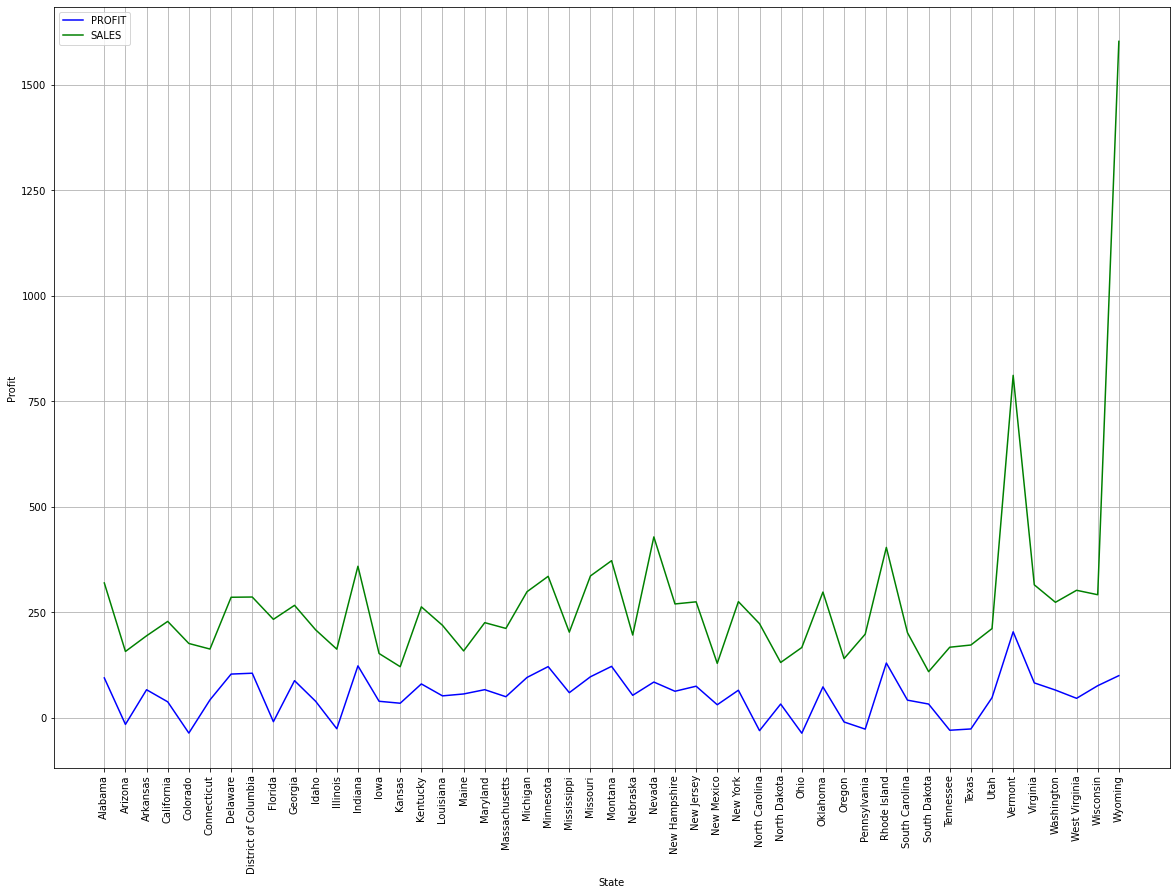

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,94.866,-15.3032,66.8115,38.1716,-35.8674,42.8231,103.931,105.959,-8.87546,88.3155,39.3678,-25.6258,123.375,39.4604,34.8518,80.5734,52.2882,56.8108,66.9636,50.263,95.9341,121.609,59.8675,97.5183,122.222,53.6077,85.0453,63.2038,75.1763,31.2734,65.637,-30.084,32.8785,-36.1863,73.5448,-9.60057,-26.5076,130.101,42.1204,32.9024,-29.1896,-26.1212,48.0478,204.089,83.0266,66.0131,46.4804,76.38,100.196
2,319.847,157.509,194.635,228.729,176.418,163.224,285.949,286.502,233.613,266.825,208.69,162.939,359.432,152.659,121.43,263.25,219.453,158.816,225.767,212.107,299.097,335.541,203.233,336.442,372.623,196.446,428.951,270.093,275.11,129.284,275.6,223.306,131.416,166.862,298.233,140.574,198.487,404.071,201.945,109.63,167.551,172.78,211.699,811.761,315.342,273.995,302.456,291.951,1603.14


In [128]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 14)
sns.lineplot( x = sm.index,y = sm["Profit"], ax=ax, legend = "brief", color = "blue", label ="PROFIT")
sns.lineplot( x = sm.index,y = sm["Sales"], ax=ax, legend = "brief", color = "Green",label ="SALES")
plt.xticks(rotation =90)
plt.grid()
plt.show()
d1 = pd.DataFrame([sm.index,sm["Profit"],sm["Sales"]])
d1.head()


### Profit and Quantity variation

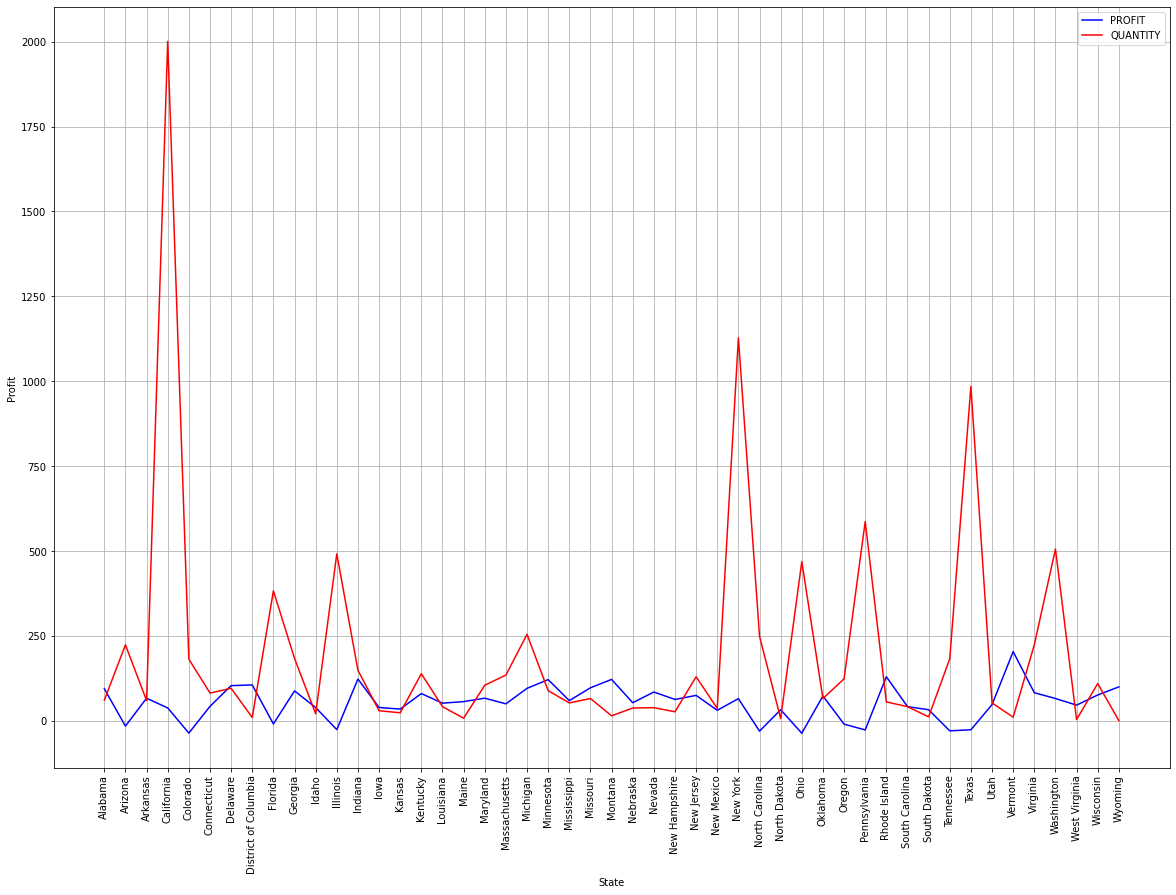

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,94.866,-15.3032,66.8115,38.1716,-35.8674,42.8231,103.931,105.959,-8.87546,88.3155,39.3678,-25.6258,123.375,39.4604,34.8518,80.5734,52.2882,56.8108,66.9636,50.263,95.9341,121.609,59.8675,97.5183,122.222,53.6077,85.0453,63.2038,75.1763,31.2734,65.637,-30.084,32.8785,-36.1863,73.5448,-9.60057,-26.5076,130.101,42.1204,32.9024,-29.1896,-26.1212,48.0478,204.089,83.0266,66.0131,46.4804,76.38,100.196
2,61,224,60,2001,182,82,96,10,383,184,21,492,149,30,24,139,42,8,105,135,255,89,53,66,15,38,39,27,130,37,1128,249,7,469,66,124,587,56,42,12,183,985,53,11,224,506,4,110,1


In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 14)
sns.lineplot( x = sm.index,y = sm["Profit"], ax=ax, legend = "brief", color = "blue", label ="PROFIT")
sns.lineplot( x = sm.index,y = sm["Quantity"], ax=ax, legend = "brief", color = "Red", label ="QUANTITY")
plt.xticks(rotation =90)
plt.grid()
plt.show()

d2 = pd.DataFrame([sm.index,sm["Profit"],sm["Quantity"]])
d2.head()

### Profit and Discount variation in each state

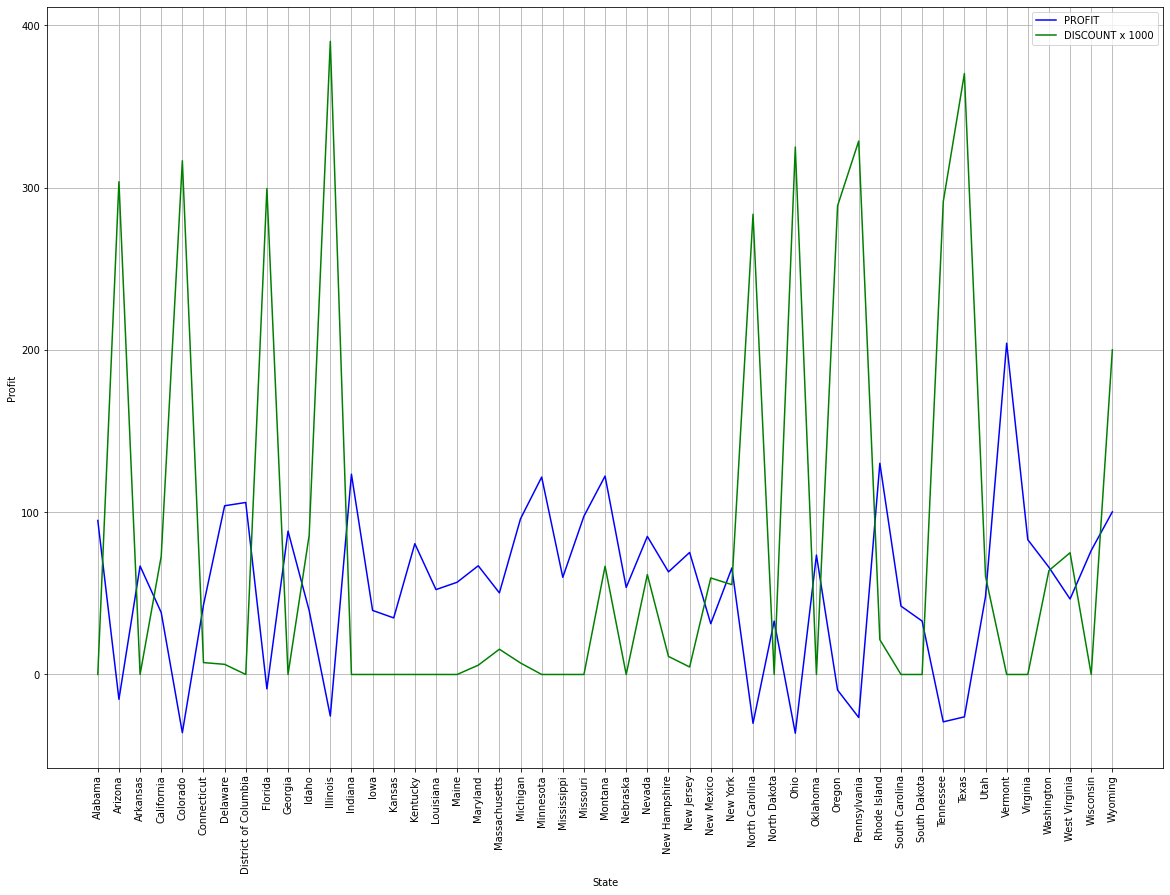

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,94.866,-15.3032,66.8115,38.1716,-35.8674,42.8231,103.931,105.959,-8.87546,88.3155,39.3678,-25.6258,123.375,39.4604,34.8518,80.5734,52.2882,56.8108,66.9636,50.263,95.9341,121.609,59.8675,97.5183,122.222,53.6077,85.0453,63.2038,75.1763,31.2734,65.637,-30.084,32.8785,-36.1863,73.5448,-9.60057,-26.5076,130.101,42.1204,32.9024,-29.1896,-26.1212,48.0478,204.089,83.0266,66.0131,46.4804,76.38,100.196
2,0,0.303571,0,0.0727636,0.316484,0.00731707,0.00625,0,0.299347,0,0.0857143,0.390041,0,0,0,0,0,0,0.00571429,0.0155556,0.00705882,0,0,0,0.0666667,0,0.0615385,0.0111111,0.00461538,0.0594595,0.0553191,0.283534,0,0.324947,0,0.28871,0.32862,0.0214286,0,0,0.291257,0.370193,0.0603774,0,0,0.0640316,0.075,0,0.2


In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 14)
sns.lineplot( x = sm.index,y = sm["Profit"], ax=ax, legend = "brief", color = "blue", label ="PROFIT")
sns.lineplot( x = sm.index,y = 1000*sm["Discount"], ax=ax, legend = "brief", color = "green",label ="DISCOUNT x 1000")
plt.xticks(rotation =90)
plt.grid()
plt.show()
d3 = pd.DataFrame([sm.index,sm["Profit"],sm["Discount"]])
d3.head()